In [38]:
# Import all the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# load dataset
dataset = pd.read_csv(r"C:\Users\Dell\Downloads\emp_sal.csv")
dataset

,Position,Level,Salary
0,Jr Software Engineer,1,45000
1,Sr Software Engineer,2,50000
2,Team Lead,3,60000
3,Manager,4,80000
4,Sr manager,5,110000
5,Region Manager,6,150000
6,AVP,7,200000
7,VP,8,300000
8,CTO,9,500000
9,CEO,10,1000000


In [3]:
# Divide the Variable into dependent and independent variable
x = dataset.iloc[:,1:2].values
y = dataset.iloc[:,2].values

In [4]:
print(x)
print(y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [5]:
# split data into train test split
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test  = train_test_split(x,y, test_size = 0.2, random_state = 0)

In [65]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

for depth in range(1,6):
    model = DecisionTreeRegressor(
        max_depth=depth,
        random_state=0
    )
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(depth, r2_score(y_test, y_pred))

1 -0.4430026142688479
2 0.3468078512396694
3 0.586748163452709
4 0.5851627066115703
5 0.5857438016528926


In [66]:
# Decision Tree Regressor
regressor = DecisionTreeRegressor(criterion = 'squared_error', max_depth = 3, min_samples_leaf =2 ,max_leaf_nodes=5, random_state = 0)
regressor.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=3, max_leaf_nodes=5, min_samples_leaf=2,
                      random_state=0)

In [67]:
# Prediction on test size
y_pred_test = regressor.predict(x_test)

In [68]:
# Prediction for 6.5 years experience
y_65 = regressor.predict([[6.5]])
print("Predicted Salary for 6.5 years:", y_65)

Predicted Salary for 6.5 years: [175000.]


C:\Users\Dell\AppData\Local\Temp\ipykernel_2124\3073329474.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_grid = np.arange(min(x_train), max(x_train), 0.1).reshape(-1,1)


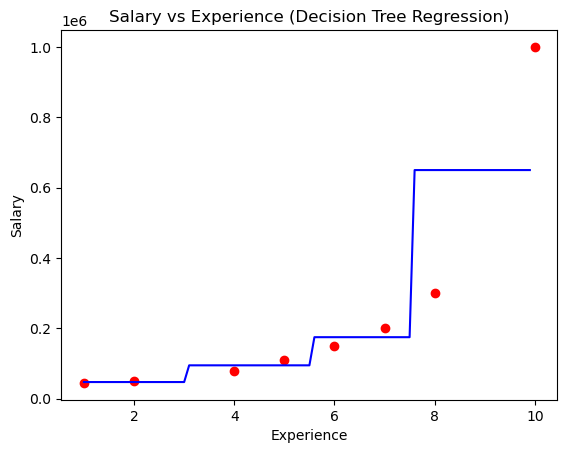

In [69]:
# Visualization (Training set)
x_grid = np.arange(min(x_train), max(x_train), 0.1).reshape(-1,1)

plt.scatter(x_train, y_train, color='red')
plt.plot(x_grid, regressor.predict(x_grid), color='blue')
plt.title('Salary vs Experience (Decision Tree Regression)')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

In [70]:
# Evaluation
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

In [71]:
print("MSE:", mse)
print("R2:", r2) 

MSE: 11328125000.0
R2: 0.7659478305785123
